# Part I - Prosper Loan Data Exploration
## by Monique van den Berg

## Introduction
In this document a dataset containing 113,937 loans with 81 variables on each loan is explored. The dataset contains information about the borrower, the loan and some risk metrics.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load data and print out a few lines
df_loan_data = pd.read_csv('prosperLoanData.csv')
df_loan_data.sample(5)

ListingKey  ListingNumber            ListingCreationDate  \
33538   C77335919708375450D4A47         967532  2013-10-23 16:11:12.330000000   
44805   523B3581237113596FA45D4         805255  2013-06-11 11:37:06.807000000   
6343    67B535524570492478C3394         612007  2012-07-14 08:17:51.927000000   
100970  BACF35941331646074DD0CB         963274  2013-10-29 08:20:41.253000000   
13285   6C9D34993177827941BAA87         483584  2010-11-09 14:43:53.697000000   

       CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
33538          NaN    60    Current                  NaN      0.31940   
44805          NaN    36    Current                  NaN      0.35356   
6343           NaN    60    Current                  NaN      0.28704   
100970         NaN    60    Current                  NaN      0.15271   
13285          NaN    36  Completed  2012-10-01 00:00:00      0.40023   

        BorrowerRate  LenderYield    ...     LP_ServiceFees  \
33538         0.2925       0.2825    ...             -25.02   
44805         0.3134       0.3034    ...             -22.21   
6343          0.2610       0.2510    ...            -138.33   
100970        0.1299       0.1199    ...             -58.12   
13285         0.3500       0.3400    ...             -17.65   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
33538                 0.0                    0.0                  0.0   
44805                 0.0                    0.0                  0.0   
6343                  0.0                    0.0                  0.0   
100970                0.0                    0.0                  0.0   
13285                 0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
33538                              0.0            1.0                0   
44805                              0.0            1.0                0   
6343                               0.0            1.0                0   
100970                             0.0            1.0                0   
13285                              0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
33538                           0                         0.0        11  
44805                           0                         0.0        47  
6343                            0                         0.0        26  
100970                          0                         0.0       105  
13285                           0                         0.0        47  

[5 rows x 81 columns]

In [3]:
# Determine the number of rows and columns
print("The number of rows and columns: {}".format(df_loan_data.shape))

The number of rows and columns: (113937, 81)


In [4]:
# Inspect data types
df_loan_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# convert term, prosper score, credit score range and income range into categorical types
df_loan_data["Term"] = df_loan_data["Term"].astype("category").cat.as_ordered()
df_loan_data["ProsperScore"] = df_loan_data["ProsperScore"].astype("category").cat.as_ordered()
df_loan_data["CreditScoreRangeLower"] = df_loan_data["CreditScoreRangeLower"].astype("category").cat.as_ordered()
df_loan_data["CreditScoreRangeUpper"] = df_loan_data["CreditScoreRangeUpper"].astype("category").cat.as_ordered()
# specify order for incomerange
df_loan_data["IncomeRange"] = df_loan_data["IncomeRange"].astype("category").cat.set_categories(['$0', 'Not employed', 'Not displayed',  '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'], ordered=True)

In [6]:
# Look for duplicated data
df_loan_data[df_loan_data.duplicated()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 81 columns]

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 columns describing each loan. Most variables are numeric in nature (61).

### What is/are the main feature(s) of interest in your dataset?

* I am most interested in borrower APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I want to investigate the following features relating to the borrower and the loan and determine their influence on borrower APR.
- Borrower: ProsperScore, CreditScoreRangeLower, CreditScoreRangeUpper, IncomeRange

- Loan: Term, BorrowerRate, LoanOriginalAmount, Investors

Since Borrower APR is the borrower rate plus fees, I expect them to be closely related.

I expect that prosper score, the original loan amount and term will have a significant efffect on borrower APR.

In [7]:
# This function display values on top of bar
def display_value_on_bar(ax):
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize='x-small') 

In [8]:
# This function creates a histogram
def create_hist(s1, feature, bin_size, x_label, y_label, title, center=True, show_value=True):

    # Set figure size
    fig, ax = plt.subplots(figsize = (16, 6))
    
    # Create bins
    bin_edges = np.arange(0, s1[feature].max() + bin_size/2, bin_size)
    
    # Adjust bins to center 
    if center:
        bins=bin_edges - bin_size/2
    else:
        bins=bin_edges
    
    # Create histogram
    ax.hist(data = s1, x = feature, bins=bins, color='b', edgecolor='white')

    # Display value on top of bar
    if show_value:
        display_value_on_bar(ax)
        
    # Add title, x and y label
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

## Univariate Exploration

In [9]:
# Only keep columns we are interested in 
df_loan_data = df_loan_data[["ProsperScore", "CreditScoreRangeLower", "CreditScoreRangeUpper", "IncomeRange", "Term",
                             "BorrowerRate", "BorrowerAPR", "LoanOriginalAmount", "LoanOriginationDate", "Investors"]]

In [10]:
# Create a copy of the original piece of data 
loan_data = df_loan_data.copy()

### Borrower APR

I'll start by looking at the distribution of the main variable of interest: borrower APR.

In [11]:
# Check for missing data
loan_data.BorrowerAPR.isnull().sum()

25

In [12]:
# There are a only 25 records without a borrower APR so we can drop them.
loan_data.dropna(subset=["BorrowerAPR"], inplace=True)

In [13]:
# View statistics
loan_data.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [14]:
# Plot setup
bin_size = 0.01
x_label = 'BorrowerAPR'
x_feature = 'BorrowerAPR'
y_label = 'count'
title = 'Distribution of BorrowerAPR'

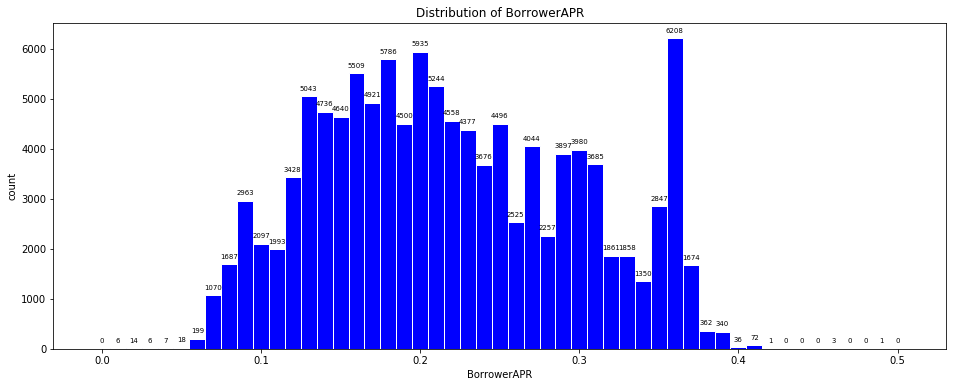

In [15]:
# Create plot
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title)

In [16]:
# Let's take a look at the entries with a lower than 0.015 BorrowerAPR
outliers = loan_data[x_feature] < 0.015
print(outliers.sum())
print(loan_data.loc[outliers,:])

6
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
46874           NaN                 520.0                 539.0   
50251           NaN                 700.0                 719.0   
53558           NaN                 480.0                 499.0   
76858           NaN                 660.0                 679.0   
78401           NaN                 600.0                 619.0   
112717          NaN                 720.0                 739.0   

           IncomeRange Term  BorrowerRate  BorrowerAPR  LoanOriginalAmount  \
46874   $50,000-74,999   36        0.0000      0.01315                1900   
50251        $1-24,999   36        0.0001      0.01325                5000   
53558    Not displayed   36        0.0021      0.00864                2600   
76858        $1-24,999   36        0.0000      0.00653                3000   
78401    Not displayed   36        0.0000      0.00653                5000   
112717       $100,000+   36        0.0000      0.01315      

The outliers appear to be valid points. It is interesting to note that some of these entries has a 0.00 BorrowerRate.

It is expected that entries which was created before 2009 won't have a ProsperScore.

In [17]:
# Let's take a look at the entries with more than 0.42 BorrowerAPR
outliers = loan_data[x_feature] > 0.42
print(outliers.sum())
print(loan_data.loc[outliers,:])

7
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
18326           NaN                   NaN                   NaN   
22195           NaN                   NaN                   NaN   
36018           NaN                   NaN                   NaN   
56761           NaN                   NaN                   NaN   
82043           NaN                   NaN                   NaN   
103973          NaN                   NaN                   NaN   
105889          4.0                 720.0                 739.0   

           IncomeRange Term  BorrowerRate  BorrowerAPR  LoanOriginalAmount  \
18326    Not displayed   36        0.4500      0.45857                3000   
22195    Not displayed   36        0.4500      0.46201                1789   
36018    Not displayed   36        0.4975      0.51229                1500   
56761    Not displayed   36        0.4975      0.50633                3000   
82043    Not displayed   36        0.4800      0.48873                3

The outliers appear to be valid points. It makes sense that the entries without a prosper score, credit score and no income info would have the highest BorrowerAPR. 

It is expected that entries which was created before 2009 won't have a ProsperScore.

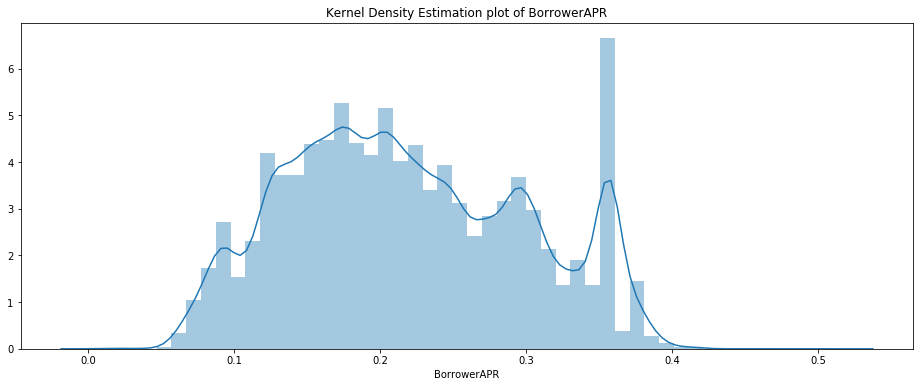

In [18]:
# Create Kernel Density Estimation plot
plt.figure(figsize = (16, 6))
plt.title('Kernel Density Estimation plot of BorrowerAPR')
sb.distplot(loan_data['BorrowerAPR']);

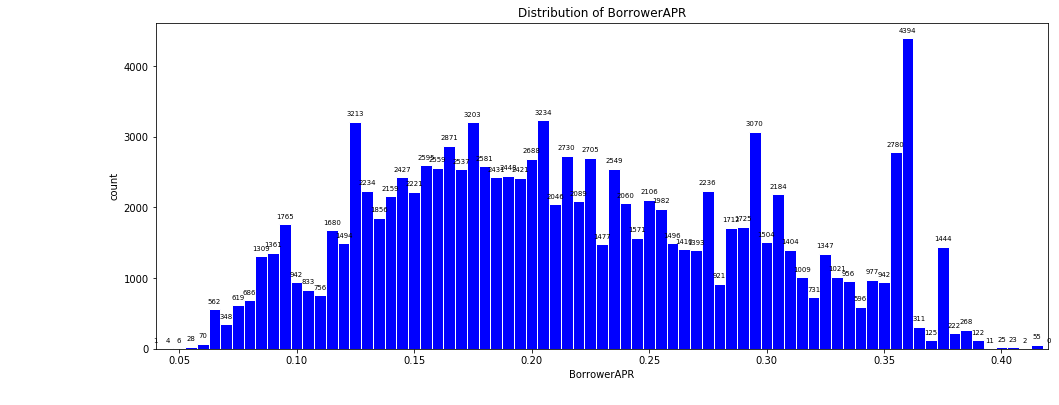

In [19]:
# Remove tails and increase bin size
bin_size = 0.005
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title)
plt.xlim(0.04, 0.42);

Limiting the axes and increasing the bin size revealed that there is a large peak at 0.358.

The borrower APR distribution is slightly skewed to the right, with a large peak at 0.358.

### Borrower Rate

Next I will take a look at the distribution of: Borrower rate.

In [20]:
# Check for missing data
loan_data.BorrowerRate.isnull().sum()

0

In [21]:
# View statistics
loan_data.BorrowerRate.describe()

count    113912.000000
mean          0.192786
std           0.074809
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [22]:
# Plot setup
bin_size = 0.01
x_label = 'BorrowerRate'
x_feature = 'BorrowerRate'
y_label = 'count'
title = 'Distribution of BorrowerRate'

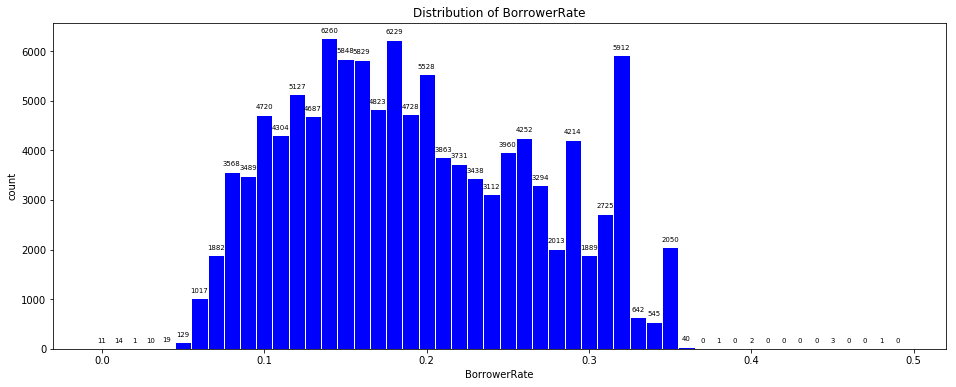

In [23]:
# Create plot
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title)

In [24]:
# Let's take a look at the entries with a lower than 0.008 BorrowerRate
outliers = loan_data[x_feature] < 0.008
print(outliers.sum())
print(loan_data.loc[outliers,:])

12
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
29859           NaN                 800.0                 819.0   
46874           NaN                 520.0                 539.0   
50251           NaN                 700.0                 719.0   
53423           NaN                 680.0                 699.0   
53558           NaN                 480.0                 499.0   
65259           NaN                 520.0                 539.0   
76858           NaN                 660.0                 679.0   
77776           NaN                 640.0                 659.0   
78401           NaN                 600.0                 619.0   
78920           NaN                 660.0                 679.0   
90051           NaN                 480.0                 499.0   
112717          NaN                 720.0                 739.0   

           IncomeRange Term  BorrowerRate  BorrowerAPR  LoanOriginalAmount  \
29859    Not displayed   36        0.0000      

The outliers appear to be valid points. It is interesting that 8 out of the 12 entries has a 0.00 BorrowerRate.

It is expected that entries which was created before 2009 won't have a ProsperScore.

In [25]:
# Let's take a look at the entries with a higher than 0.4 BorrowerRate
outliers = loan_data[x_feature] > 0.4
print(outliers.sum())
print(loan_data.loc[outliers,:])

6
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
18326           NaN                   NaN                   NaN   
22195           NaN                   NaN                   NaN   
36018           NaN                   NaN                   NaN   
56761           NaN                   NaN                   NaN   
82043           NaN                   NaN                   NaN   
103973          NaN                   NaN                   NaN   

          IncomeRange Term  BorrowerRate  BorrowerAPR  LoanOriginalAmount  \
18326   Not displayed   36        0.4500      0.45857                3000   
22195   Not displayed   36        0.4500      0.46201                1789   
36018   Not displayed   36        0.4975      0.51229                1500   
56761   Not displayed   36        0.4975      0.50633                3000   
82043   Not displayed   36        0.4800      0.48873                3000   
103973  Not displayed   36        0.4500      0.45857             

The outliers appear to be valid points. It makes sense that the entries without a prosper score, credit score and no income info would have the highest interest rate.

It is expected that entries which was created before 2009 won't have a ProsperScore.

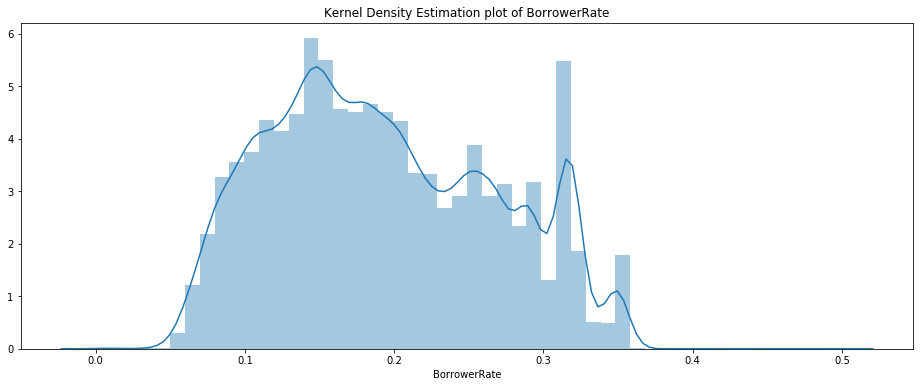

In [26]:
# Create Kernel Density Estimation plot
plt.figure(figsize = (16, 6))
plt.title('Kernel Density Estimation plot of BorrowerRate')
sb.distplot(loan_data['BorrowerRate']);

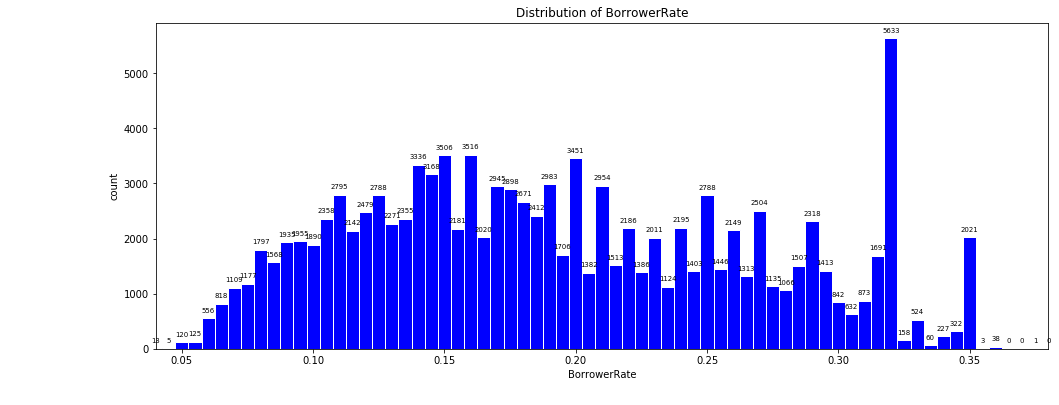

In [27]:
# Remove tails and increase bin size
bin_size = 0.005
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title)
plt.xlim(0.04, 0.38);

Limiting the axes and increasing the bin size revealed that there is a large peak at 0.32.

The borrower rate distribution is slightly skewed to the right, with a large peak at 0.32. As expected the borrower rate distribution has a similar shape to the borrower APR, just moved lower, as it excludes fees which are included in the APR.

### Loan Original Amount

Let's start with the first variable of interest: the original loan amount. Let's determine what is the most popular loan amount?

In [28]:
# Check for missing data
print(loan_data['LoanOriginalAmount'].isnull().sum())

0


In [29]:
# View statistics
loan_data.LoanOriginalAmount.describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [30]:
# plot setup
bin_size = 1000
x_label = 'LoanOriginalAmount'
x_feature = 'LoanOriginalAmount'
y_label = 'count'
title = 'Distribution of LoanOriginalAmount'

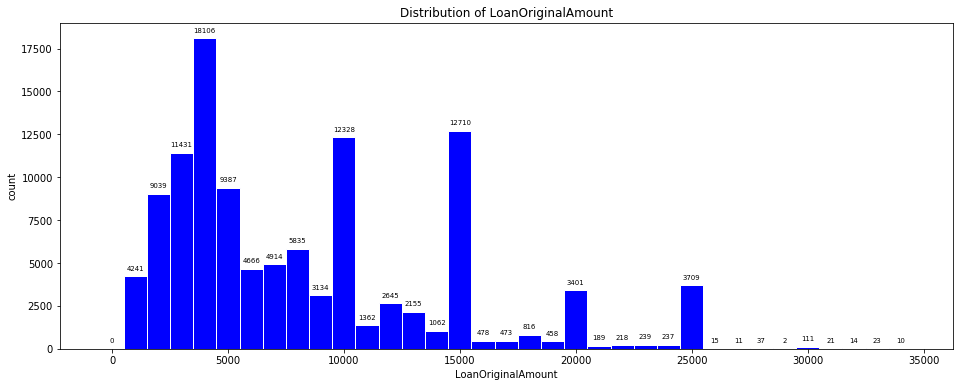

In [31]:
# Create plot
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title)

In [32]:
# Let's take a look at the entries with a 35000 LoanOriginalAmount
outliers = loan_data[x_feature] == 35000
print(outliers.sum())
print(loan_data.loc[outliers,:])

430
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper IncomeRange  \
29              6.0                 740.0                 759.0   $100,000+   
637             6.0                 740.0                 759.0   $100,000+   
687            10.0                 760.0                 779.0   $100,000+   
1223            9.0                 740.0                 759.0   $100,000+   
1368           10.0                 740.0                 759.0   $100,000+   
1370            9.0                 740.0                 759.0   $100,000+   
1422            9.0                 740.0                 759.0   $100,000+   
1481            9.0                 800.0                 819.0   $100,000+   
1554            9.0                 720.0                 739.0   $100,000+   
1845            7.0                 780.0                 799.0   $100,000+   
2126           10.0                 740.0                 759.0   $100,000+   
2288           11.0                 720.0       

The outliers appear to be valid points. It is interesting to note that all of these entries fall in the highest income range and in the higher credit score ranges. The BorrowerRate and BorrowerAPR is also quite low for these entries. 

Borrowers with more income at their disposal takes out larger loans with lower interest rates.

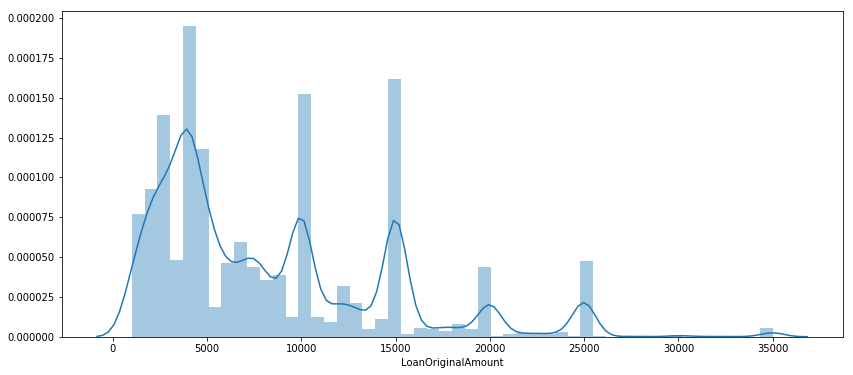

In [33]:
# Create Kernel Density Estimation plot
plt.figure(figsize = (14, 6))
sb.distplot(loan_data['LoanOriginalAmount']);

In [1]:
# Remove tails and increase bin size
bin_size = 200
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title)
plt.xlim(600, 11000);

NameError: name 'create_hist' is not defined

Limiting the axes and increasing the bin size revealed that there are peaks at round numbers. The smallest loan value is a \\$1000.

The most popular loan amount is \\$4000. The distribution is skewed to the right, with most loans below a value of \\$12000.  Round numbers are popular with peaks at 2000, 3000, 4000, 5000, 10000, 15000, 20000 and 25000.

### Term

Let's look at the second variable of interest: the loan term. Let's determine which term is the most popular?

In [35]:
# Check for missing data
print(loan_data['Term'].isnull().sum())

0


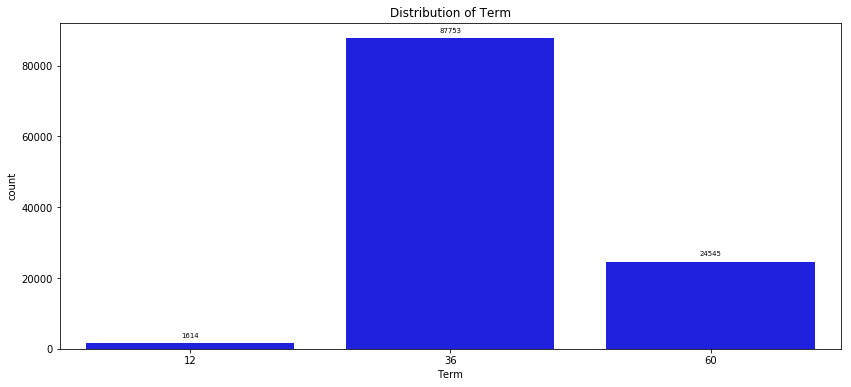

In [36]:
plt.figure(figsize = (14, 6))
ax = sb.countplot(data=loan_data, x='Term', color='b');
plt.title('Distribution of Term')
display_value_on_bar(ax)

36 months is the most popular term, with 60 months the second most popular and 12 months the least popular.

### Investors

Let's take a look at investors and determine how many investors a loan generally has? 

In [37]:
# Check for missing data
print(loan_data['Investors'].isnull().sum())

0


In [38]:
# View statistics
loan_data.Investors.describe()

count    113912.000000
mean         80.491792
std         103.244281
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

In [39]:
# plot setup
bin_size = 25
x_label = 'Investors'
x_feature = 'Investors'
y_label = 'count'
title = 'Distribution of Investors'

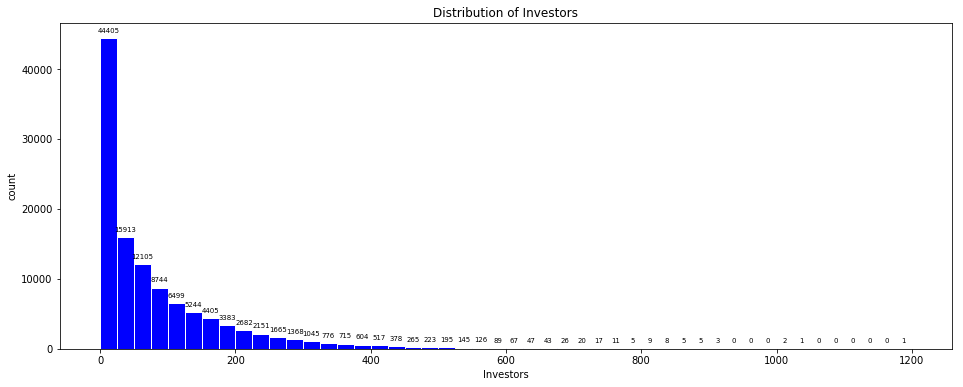

In [40]:
# Create plot
create_hist(loan_data, x_feature, bin_size, x_label, y_label, title, center=False)

In [41]:
# Let's take a look at the entries with more than 1000 investors
outliers = loan_data[x_feature] > 1000
print(outliers.sum())
print(loan_data.loc[outliers,:])

4
      ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
28107          5.0                 800.0                 819.0   
53427          7.0                 800.0                 819.0   
77068          7.0                 800.0                 819.0   
89166          8.0                 760.0                 779.0   

          IncomeRange Term  BorrowerRate  BorrowerAPR  LoanOriginalAmount  \
28107  $50,000-74,999   36        0.2010      0.22338               25000   
53427       $100,000+   36        0.1145      0.11798               25000   
77068  $50,000-74,999   36        0.1140      0.11748               20000   
89166  $75,000-99,999   36        0.1235      0.14486               20000   

       LoanOriginationDate  Investors  
28107  2009-09-18 00:00:00       1024  
53427  2009-12-29 00:00:00       1035  
77068  2009-12-29 00:00:00       1011  
89166  2009-12-11 00:00:00       1189  


The outliers appear to be valid points. It is interesting to note that these entries fall in a very high creditscore range and their borrower rate and APR is on the lower end.

With a large number of investors a higher amount can be borrowed with a lower interest rate.

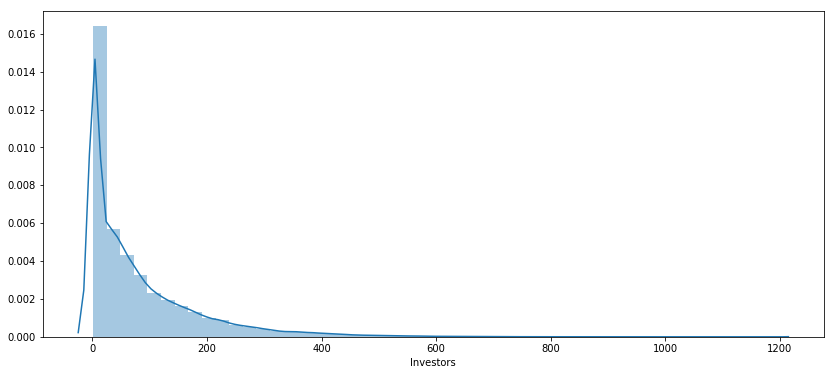

In [42]:
# Create Kernel Density Estimation plot
plt.figure(figsize = (14, 6))
sb.distplot(loan_data['Investors']);

In [43]:
# View statistics in log
np.log10(loan_data[x_feature].describe())

count    5.056569
mean     1.905752
std      2.013866
min      0.000000
25%      0.301030
50%      1.643453
75%      2.060698
max      3.075182
Name: Investors, dtype: float64

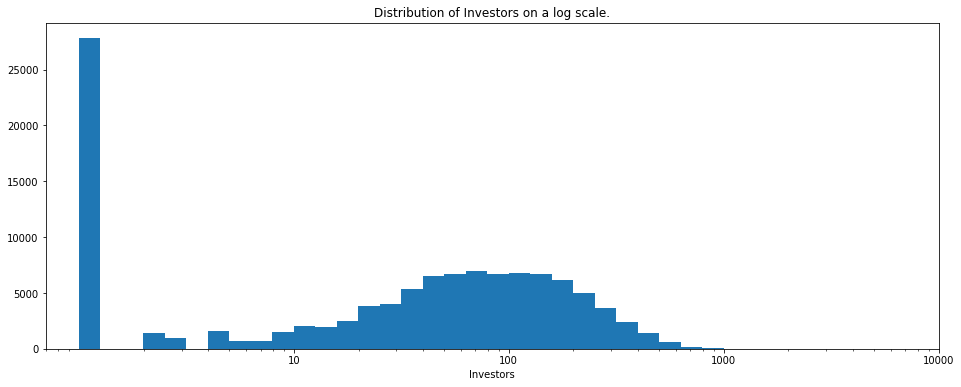

In [44]:
# There's a long tail in the distribution, so let's plot it on a log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(loan_data[x_feature].max())+log_binsize, log_binsize)

plt.figure(figsize=[16, 6])
plt.hist(data = loan_data, x = x_feature, bins = bins)
plt.xscale('log')
plt.xticks([10e0, 10e1, 10e2, 10e3], [10, 100, 1000, 10000])
plt.xlabel(x_label)
plt.title('Distribution of Investors on a log scale.')
plt.show()

When plotted on a log-scale, the investors distribution has a very large spike at 1, and a normal distribution around 90.

A loan generally only has a single investor. The distribution is right skewed with very few loans with more than 800 investors.

### Credit Score Range Lower and Upper

Next we move to the credit score range. Let's determine the most popular range.

In [45]:
# Check for missing data
print(loan_data['CreditScoreRangeLower'].isnull().sum())

566


The number of missing data points is the same for both the lower and upper range.

In [46]:
# View statistics
print("Lower range")
print(loan_data.CreditScoreRangeLower.describe())
print("\nUpper range")
print(loan_data.CreditScoreRangeUpper.describe())

Lower range
count     113346.0
unique        26.0
top          680.0
freq       16492.0
Name: CreditScoreRangeLower, dtype: float64

Upper range
count     113346.0
unique        26.0
top          699.0
freq       16492.0
Name: CreditScoreRangeUpper, dtype: float64


In [47]:
# As a small number of values are missing we replace the missing values with the mode
loan_data['CreditScoreRangeLower'] = loan_data['CreditScoreRangeLower'].fillna(680.00)
loan_data['CreditScoreRangeUpper'] = loan_data['CreditScoreRangeUpper'].fillna(699.00)

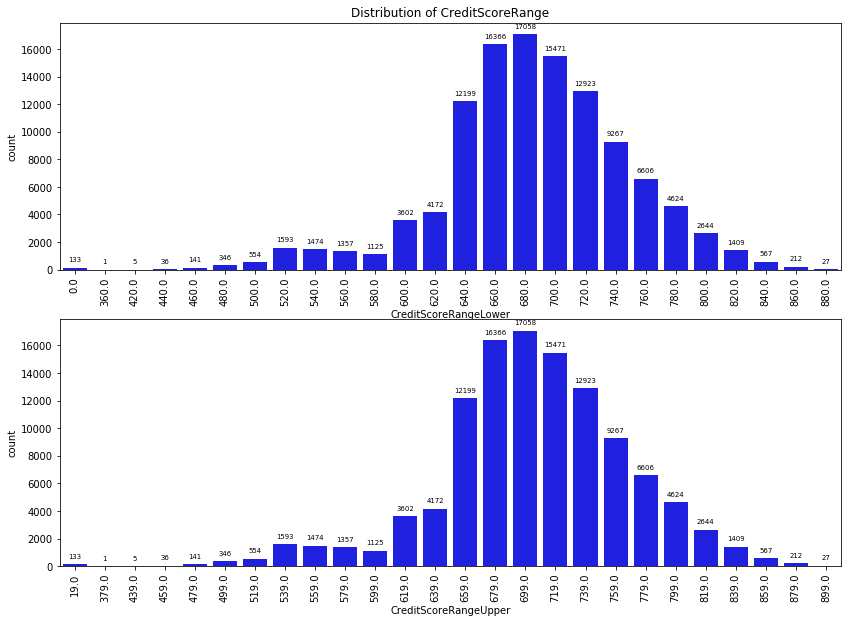

In [48]:
# let's plot the upper and lower bound together as they should have the same distribution
fig, ax = plt.subplots(nrows=2, figsize = (14, 10))
sb.countplot(data=loan_data, x='CreditScoreRangeLower', color='b', ax = ax[0]);
sb.countplot(data=loan_data, x='CreditScoreRangeUpper', color='b', ax = ax[1]);
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Distribution of CreditScoreRange')
ax[1].tick_params(axis='x', rotation=90)
display_value_on_bar(ax[0])
display_value_on_bar(ax[1])

In [49]:
# Let's take a look at the entries which fall in the lowest credit score range
outliers = loan_data['CreditScoreRangeLower'] == 0.0
print(outliers.sum())
print(loan_data.loc[outliers,:])

133
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
794             NaN                   0.0                  19.0   
912             NaN                   0.0                  19.0   
1685            NaN                   0.0                  19.0   
4290            NaN                   0.0                  19.0   
4371            NaN                   0.0                  19.0   
4430            NaN                   0.0                  19.0   
4672            NaN                   0.0                  19.0   
5684            NaN                   0.0                  19.0   
6877            NaN                   0.0                  19.0   
7739            NaN                   0.0                  19.0   
9048            NaN                   0.0                  19.0   
9473            NaN                   0.0                  19.0   
13395           NaN                   0.0                  19.0   
13525           NaN                   0.0                 

It is expected that entries which was created before 2009 won't have a ProsperScore.

It is interesting to note that these entries has their IncomeRange as "Not displayed", don't have a ProsperScore and falls in the lowest CreditScoreRange, this most likely means that these entries don't have a valid credit score.

In [50]:
# remove outlier points
loan_data = loan_data.loc[-outliers,:]

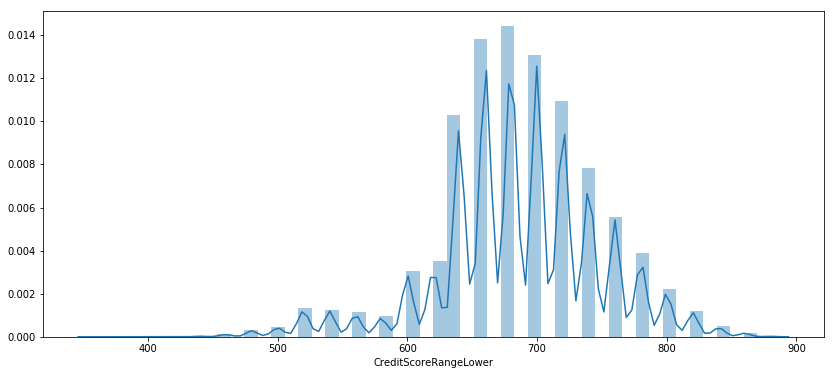

In [51]:
# Create Kernel Density Estimation plot
plt.figure(figsize = (14, 6))
sb.distplot(loan_data['CreditScoreRangeLower']);

The most popular credit score range is 680-699. The credit score range has a left skewed distribution.

### Prosper Score

Next up let's look at the prosper score and determine which score is the most popular?

In [52]:
# Check for missing data
loan_data.ProsperScore.isnull().sum()

28926

In [53]:
# lets check if there are entries which was created after July 2009 which should have a ProsperScore which don't
missing_score = (loan_data['ProsperScore'].isnull()) & (loan_data['LoanOriginationDate']> '2009-07-01')
print(missing_score.sum())
print(loan_data.loc[missing_score,:])

131
       ProsperScore CreditScoreRangeLower CreditScoreRangeUpper  \
150             NaN                 840.0                 859.0   
528             NaN                 720.0                 739.0   
725             NaN                 740.0                 759.0   
1977            NaN                 740.0                 759.0   
3487            NaN                 720.0                 739.0   
6500            NaN                 720.0                 739.0   
6629            NaN                 720.0                 739.0   
7277            NaN                 660.0                 679.0   
8602            NaN                 660.0                 679.0   
9177            NaN                 720.0                 739.0   
9508            NaN                 720.0                 739.0   
10441           NaN                 860.0                 879.0   
14865           NaN                 660.0                 679.0   
16232           NaN                 720.0                 

In [54]:
# There are a only 131 records without a ProsperScore after 2009 so we can drop them.
loan_data = loan_data.loc[-missing_score,:]

In [55]:
# View statistics
loan_data.ProsperScore.describe()

count     84853.0
unique       11.0
top           4.0
freq      12595.0
Name: ProsperScore, dtype: float64

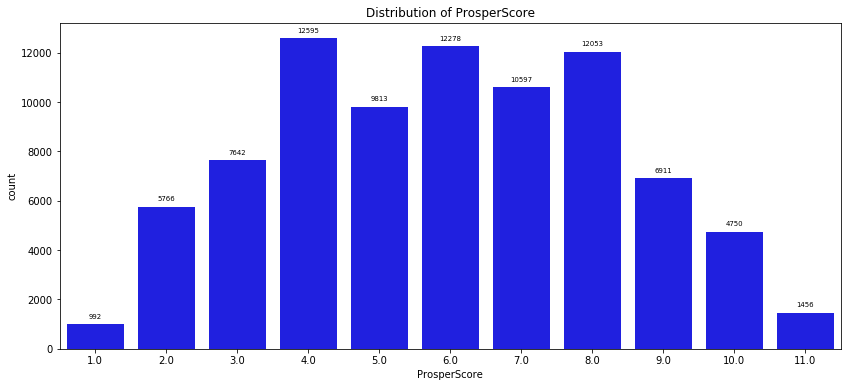

In [56]:
# Plot distribution including missing values
plt.figure(figsize = (14, 6))
ax = sb.countplot(data=loan_data, x='ProsperScore', color='b');
plt.title('Distribution of ProsperScore')
display_value_on_bar(ax)

The most popular prosper scores are 4, 6 and 8.

In [57]:
# Replace missing values with mode 4.0
loan_data['ProsperScoreMod'] = loan_data['ProsperScore'].fillna(4.0)

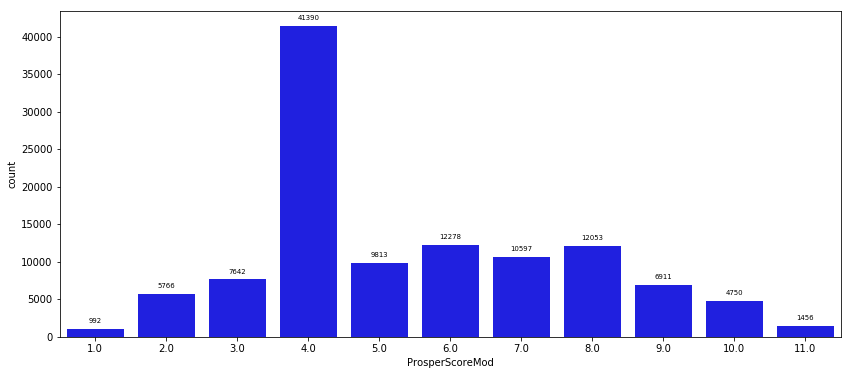

In [58]:
# Plot of distribution after replacing missing values with the mode
plt.figure(figsize = (14, 6))
ax = sb.countplot(data=loan_data, x='ProsperScoreMod', color='b');
display_value_on_bar(ax)

After the missing values were replaced with the mode 4 became the most popular prosper score by quite a large margin.

As quite a large number of ProsperScore values were missing due to the loans being created before 2009, replacing the missing values with the mode had a significant effect on the distribution.

For the rest of the investigation we will use the ProsperScore values without replacing the missing values with the mode.

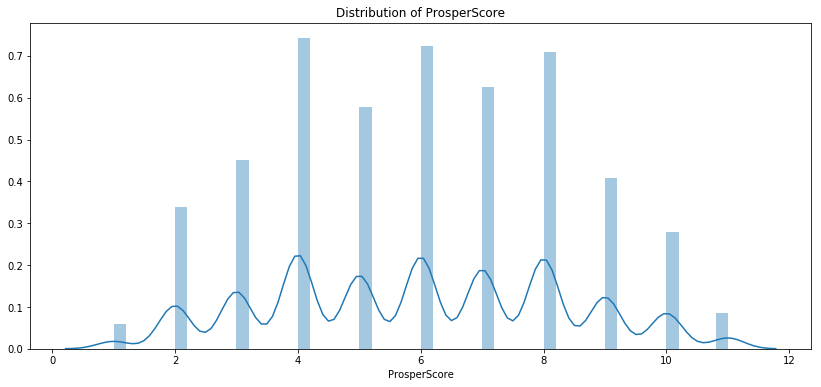

In [81]:
# Create Kernel Density Estimation plot
plt.figure(figsize = (14, 6))
plt.title('Distribution of ProsperScore')
sb.distplot(loan_data['ProsperScore'].dropna());

### Income range

Finally let's move to income range and determine the most popular income range.

In [60]:
# Check for missing data
print(loan_data['IncomeRange'].isnull().sum())

0


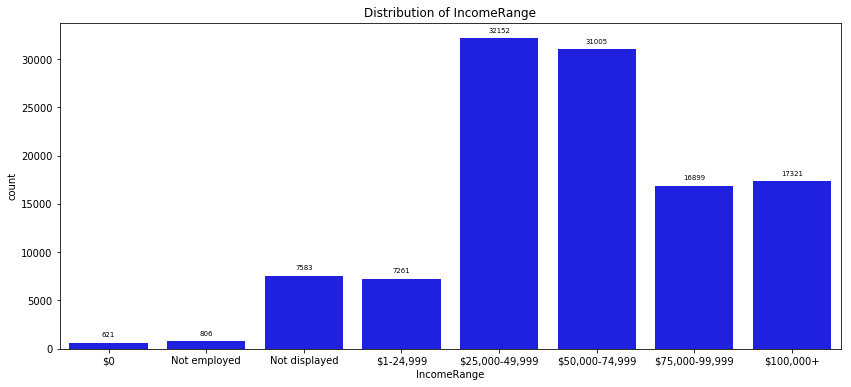

In [61]:
plt.figure(figsize = (14, 6))
ax = sb.countplot(data=loan_data, x='IncomeRange', color='b');
plt.title('Distribution of IncomeRange')
display_value_on_bar(ax)

The most popular income range is \\$25000-49999. People in the \\$25000-49999 and \\$50000-74999 income ranges borrows the most money.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

25 entries were identified to not have a borrower APR and were removed as this is not a significant number. The borrower APR distribution is multimodal and slightly skewed to the right, with a peak around 0.17, 0.29 and a large peak around 0.358.
There was no need to perform a transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The number of investors took on a large range of values, from 1 to 1189, so a log transformation was performed. Under the transformation, a large spike at 1 was revealed and a normal distribution around 90. 

133 outlier points were identified, when investigating the credit score range. Overall, these points can be characterized by falling in a very low credit score range 0-19, by having their income range as "Not displayed" and not having a prosper score. All of these points were removed from the dataset for safety as these entries most lileky don't have a valid credit score.

28926 entries were identified to not have a ProsperScore of these 131 were created after 2009 and should have a ProsperScore. The 131 were removed from the dataset as they are erroneous. The remaining values were kept as Nan as changing these missing values to the mode has quite a significant influence on the distribution.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [63]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'Investors']
categoric_vars1 = ['Term', 'ProsperScore']
categoric_vars2 = ['CreditScoreRangeLower', 'IncomeRange']
categoric_vars = categoric_vars1 + categoric_vars2 + ['CreditScoreRangeUpper']

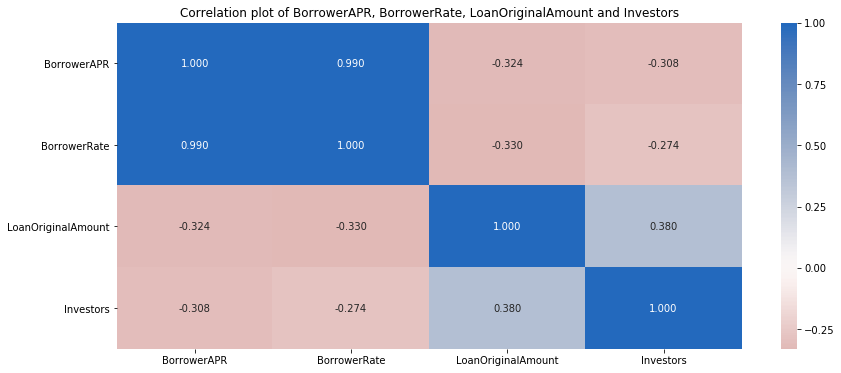

In [64]:
# correlation plot
plt.figure(figsize = [14, 6])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Correlation plot of BorrowerAPR, BorrowerRate, LoanOriginalAmount and Investors")
plt.show()

loan_data.shape= (113648, 11)
loan_data_samp.shape= (10000, 11)


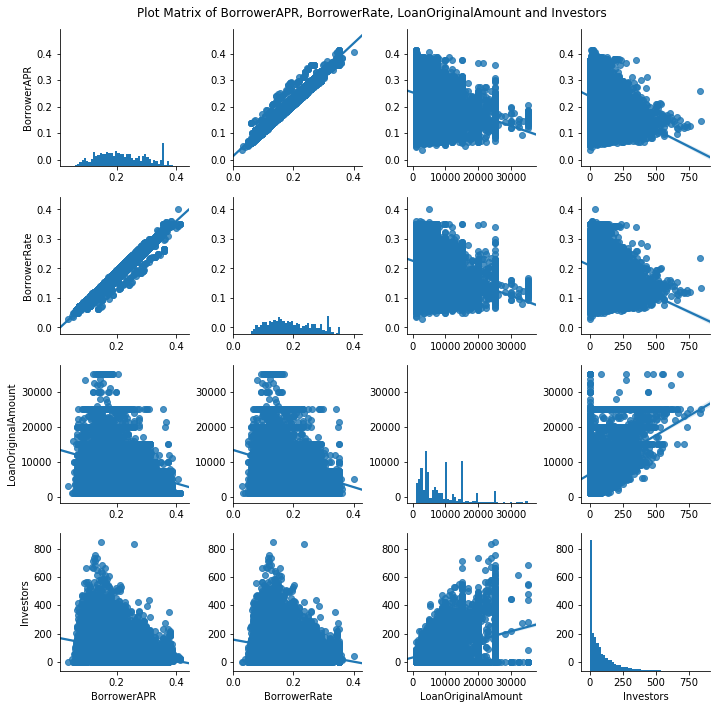

In [65]:
# plot matrix: sample 10000 laons so that plots are clearer and they render faster
print("loan_data.shape=",loan_data.shape)
loan_data_samp = loan_data.sample(n=10000, replace = False)
print("loan_data_samp.shape=",loan_data_samp.shape)

g = sb.PairGrid(data = loan_data_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 50);
g.map_offdiag(sb.regplot)
plt.suptitle('Plot Matrix of BorrowerAPR, BorrowerRate, LoanOriginalAmount and Investors')
plt.subplots_adjust(top=0.95)

It is confirmed that BorrowerAPR and BorrowerRate are highly correlated with one another, which is expected since BorrowerAPR is BorrowerRate plus fees.

BorrowerAPR and BorrowerRate are both negatively correlated with LoanOriginalAmount and Investors.
LoanOriginalAmount and Investors are positevly correlated with one another.

A larger amount being borrowed or a higher number of investors results in a lower interest rate and APR.

Let's move on to looking at how borrower APR correlate with the categorical variables.

In [66]:
# Function to create violin plot
def violingrid(x, y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """
    ax = sb.violinplot(x=x, y=y, color='b', inner='quartile')
    ax.tick_params(rotation=90)

In [67]:
# Function to create box plot
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    ax = sb.boxplot(x=x, y=y, color='b')               
    ax.tick_params(rotation=90)

In [68]:
# Function to create reg plot
def reggrid(x, y, **kwargs):
    """ Quick hack for creating reg plots with seaborn's PairGrid. """
    ax = sb.regplot(x=x, y=y, color='b')               
    ax.tick_params(rotation=90)

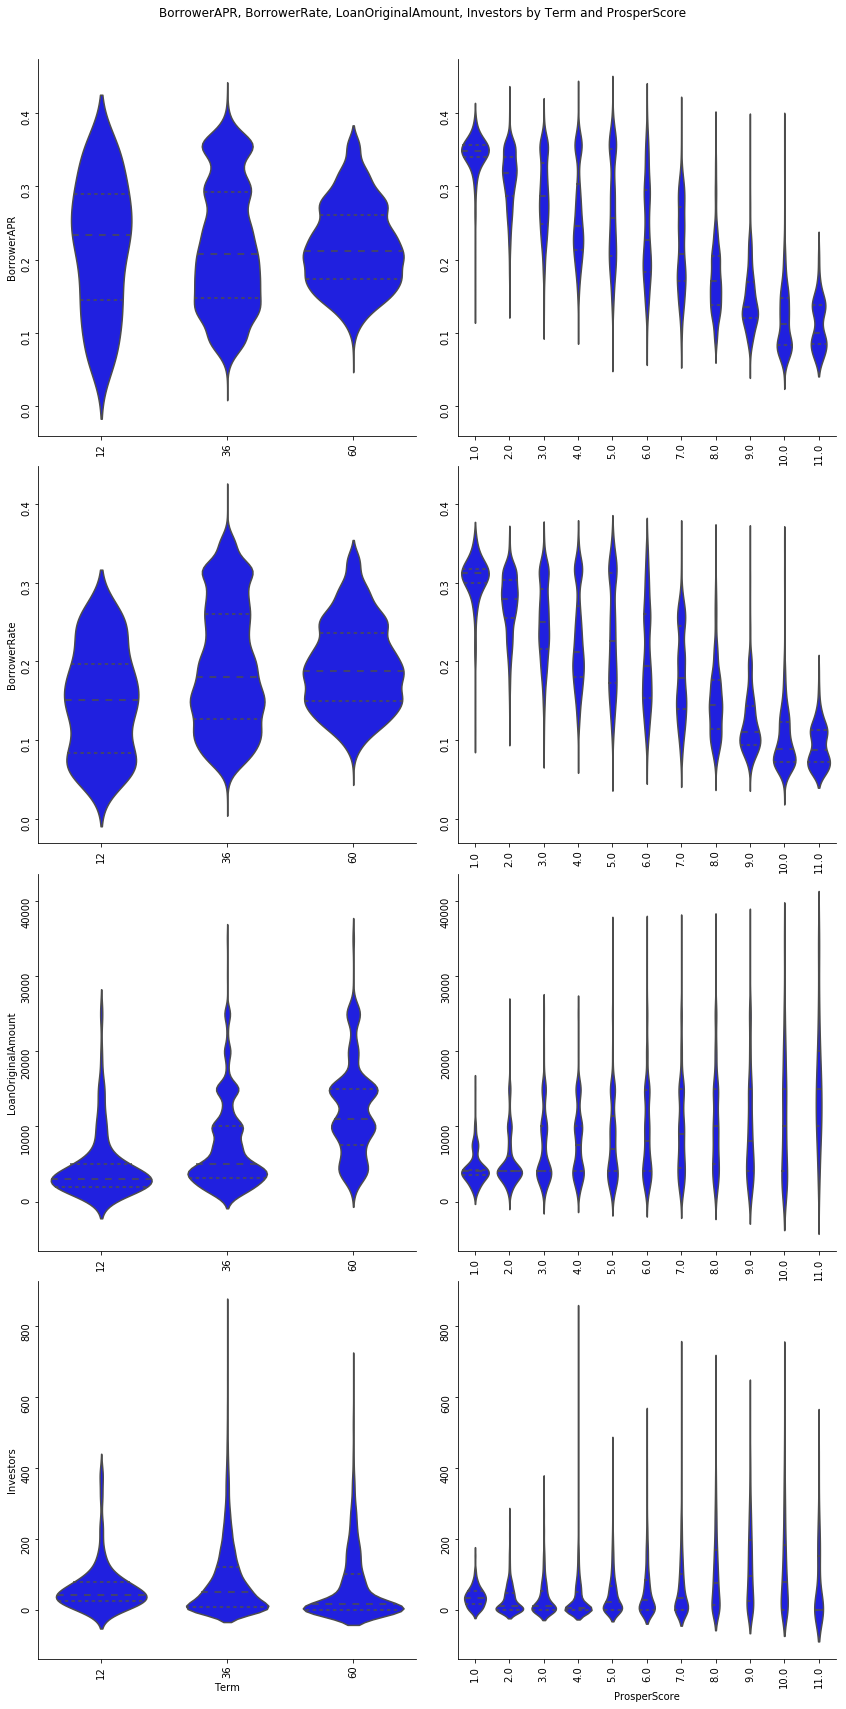

In [69]:
# plot matrix of numeric features against first group of categorical features.
plt.figure(figsize = [4, 2])
g = sb.PairGrid(data = loan_data_samp, y_vars = numeric_vars, x_vars = categoric_vars1, size=6)
g.map(violingrid)
plt.suptitle('BorrowerAPR, BorrowerRate, LoanOriginalAmount and Investors by Term and ProsperScore')
plt.subplots_adjust(top=0.95)
plt.show();

Term seems to have no effect on BorrowerAPR, there is no correlation.
There is a negative relationship between BorrowerAPR and ProsperScore.
Term has a slightly positive relationship with BorrowerRate.
There is a negative relationship between BorrowerRate and ProsperScore.
There is a positive relationship between LoanOriginalAmount and both Term and ProsperScore.
Term has a slightly negative relationship with Investors. 
There is a positive relationship between Investors and ProsperScore.

A higher prosper score results in a lower interest rate and APR, a higher number of investors and a larger amount being borrowed.
A longer loan period results in a higher interest rate, a larger amount being borrowed and fewer investors. The loan period has no effect on APR.

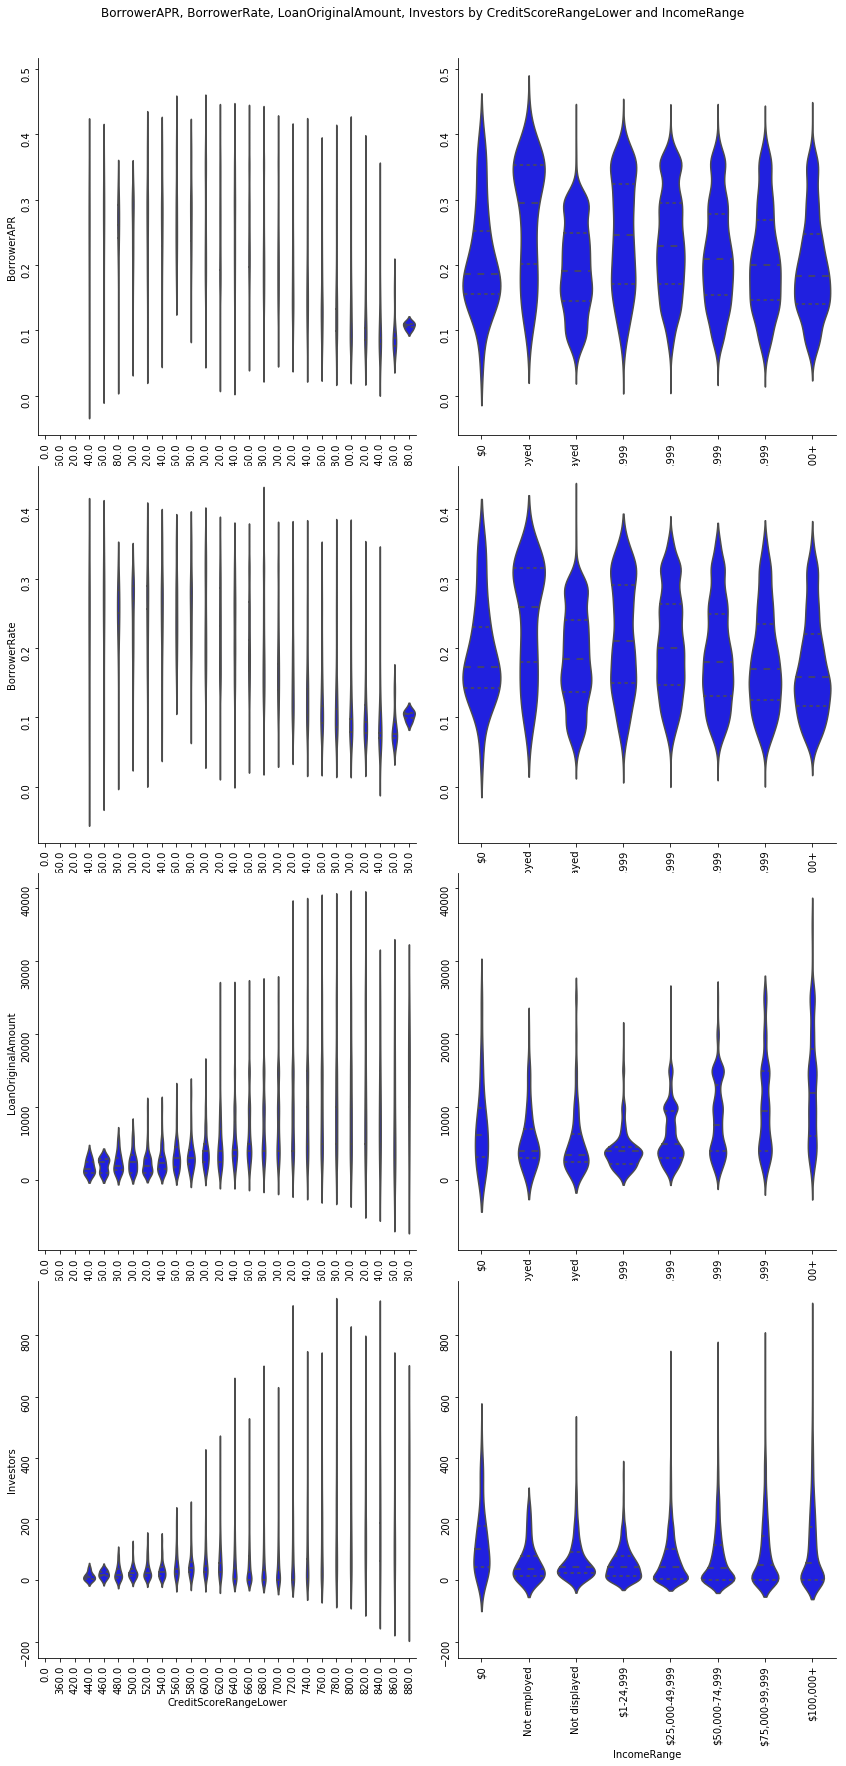

In [70]:
# plot matrix of numeric features against second group of categorical features.
plt.figure(figsize = [4, 2])
g = sb.PairGrid(data = loan_data_samp, y_vars = numeric_vars, x_vars = categoric_vars2, size=6)
g.map(violingrid)
plt.suptitle('BorrowerAPR, BorrowerRate, LoanOriginalAmount and Investors by CreditScoreRangeLower and IncomeRange')
plt.subplots_adjust(top=0.95)
plt.show();

There is a negative relationship between BorrowerAPR and both CreditScoreRange and IncomeRange.
There is a negative relationship between BorrowerRate and both CreditScoreRange and IncomeRange.
There is a positive relationship between LoanOriginalAmount and both CreditScoreRange and IncomeRange. 
There is a positive relationship between Investors and both CreditScoreRange and IncomeRange.

A higher credit score range and a higher income range results in a lower interest rate, a lower APR, a larger amount being borrowed, and a higher number of investors.

Finally, let's look at relationships between the five categorical variables.

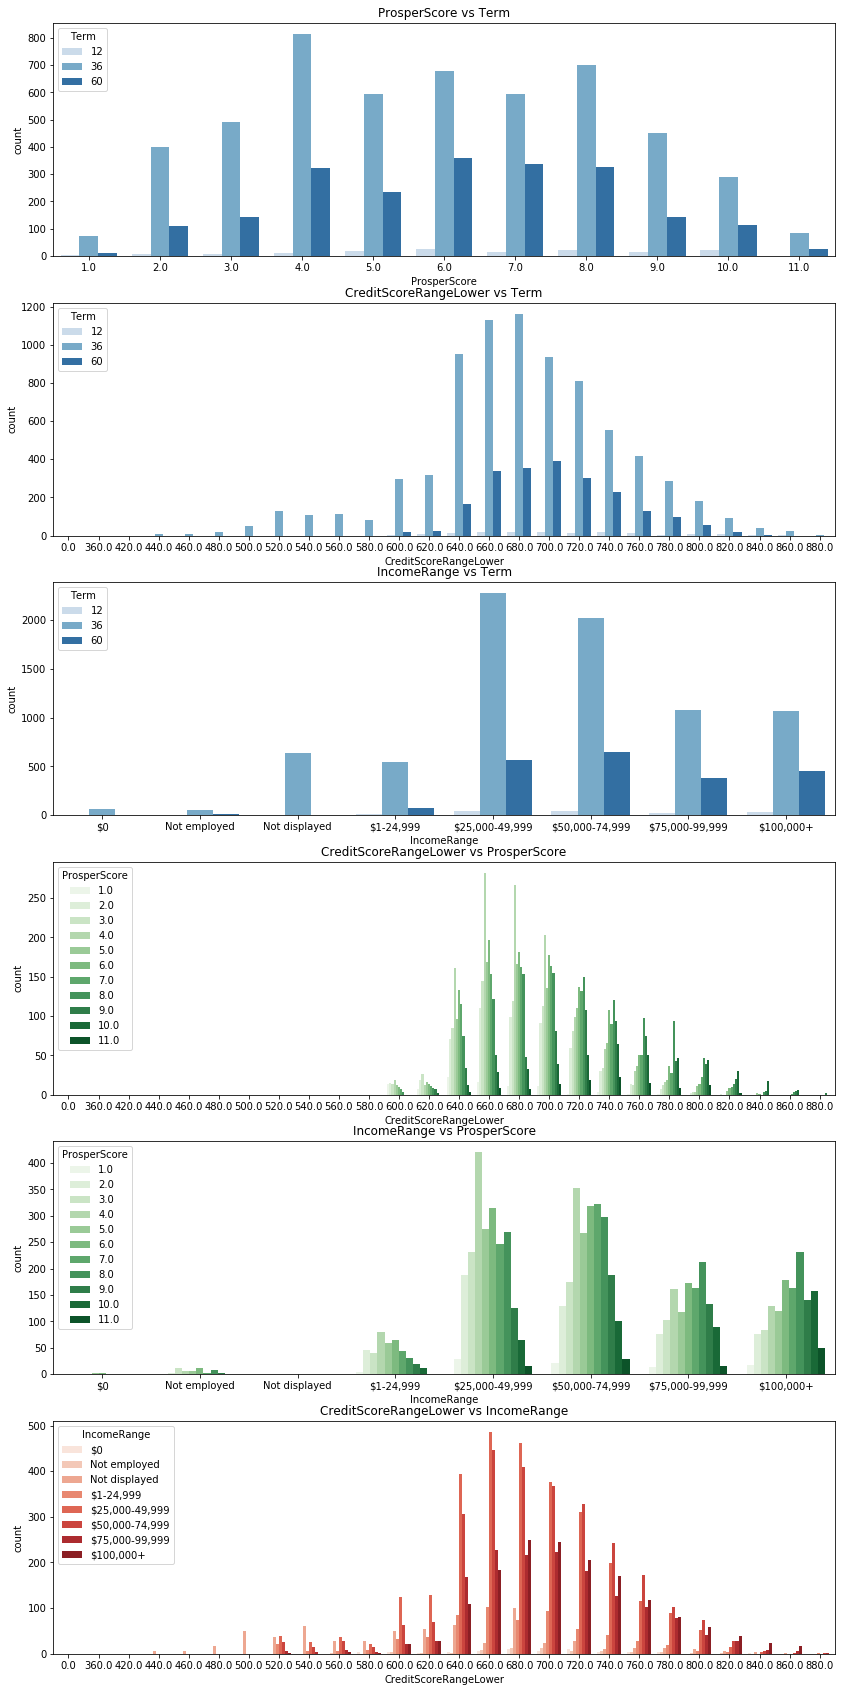

In [71]:
plt.figure(figsize = [14, 30])

# subplot 1: ProsperScore vs Term
plt.subplot(6, 1, 1)
ax1 = sb.countplot(data = loan_data_samp, x = 'ProsperScore', hue = 'Term', palette = 'Blues')
ax1.set_title('ProsperScore vs Term')
plt.legend(loc='upper left', title='Term')

# subplot 2: CreditScoreRangeLower vs Term
plt.subplot(6, 1, 2)
ax2 = sb.countplot(data = loan_data_samp, x = 'CreditScoreRangeLower', hue = 'Term', palette = 'Blues')
ax2.set_title('CreditScoreRangeLower vs Term')
plt.legend(loc='upper left', title='Term')

# subplot 3: IncomeRange vs Term
plt.subplot(6, 1, 3)
ax3 = sb.countplot(data = loan_data_samp, x = 'IncomeRange', hue = 'Term', palette = 'Blues')
ax3.set_title('IncomeRange vs Term')
plt.legend(loc='upper left', title='Term')

# subplot 4: CreditScoreRangeLower vs ProsperScore
plt.subplot(6, 1, 4)
ax4 = sb.countplot(data = loan_data_samp, x = 'CreditScoreRangeLower', hue = 'ProsperScore', palette = 'Greens')
ax4.set_title('CreditScoreRangeLower vs ProsperScore')
plt.legend(loc='upper left', title='ProsperScore')

# subplot 5: IncomeRange vs ProsperScore
plt.subplot(6, 1, 5)
ax5 = sb.countplot(data = loan_data_samp, x = 'IncomeRange', hue = 'ProsperScore', palette = 'Greens')
ax5.set_title('IncomeRange vs ProsperScore')
plt.legend(loc='upper left', title='ProsperScore')

# subplot 6: CreditScoreRangeLower vs IncomeRange
plt.subplot(6, 1, 6)
ax6 = sb.countplot(data = loan_data_samp, x = 'CreditScoreRangeLower', hue = 'IncomeRange', palette = 'Reds')
ax6.set_title('CreditScoreRangeLower vs IncomeRange')
plt.legend(loc='upper left', title='IncomeRange')

plt.show()

The most popular term is 36 months across the entire prosper score range. All credit score ranges are biased towards a 36 month loan term. All income ranges are biased towards a 36 months loan term. There is a positive relationship between credit score range and prosper score. There is a positive relationship between income range and prosper score. There is a positive relationship between credit score range and income range.

36 months is dominant in the categorical variables.
A higher credit score results in a higher income range.
A higher credit score or a higher income range results in a higher prosper score.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

BorrowerAPR is highly correlated with the BorrowerRate, which is expected. BorrowerAPR has a negative relationship with LoanOriginalAmount, Investors, CreditScoreRange, IncomeRange and ProsperScore. A larger loan amount, higher number of investors, a bigger income, a higher prosper score and a better credit score range results in a lower interest rate. 

Interestingly there is no correlation between Term and BorrowerAPR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

LoanOriginalAmount has a positive relationship with Investors, Term, ProsperScore, CreditScoreRange and IncomeRange.

Investors has a positive relationship with LoanOriginalAmount, ProsperScore, CreditScoreRange and IncomeRange.
Investors has a negative relationship with Term. 

ProsperScore has a positive relationship with LoanOriginalAmount, CreditScoreRange, IncomeRange and Investors.
There is an interesting relationship between ProsperScore and Term, it's relationship doesn't seem to remain the same. 

Term has complex relationships with all of the categorical variables, some of these relationships might be interesting to investigate in the multivarite section.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how Prosper score and term play into the relationship between borrower APR, loan original amount and investors respectively.

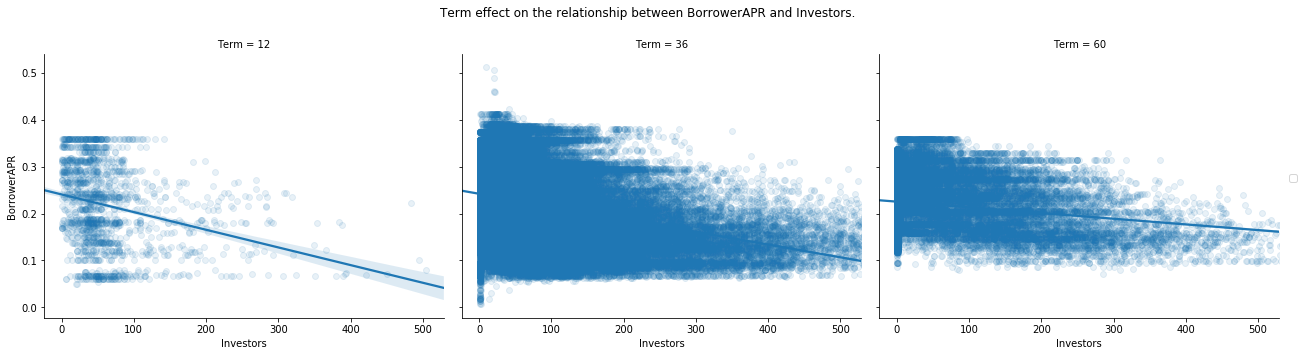

In [73]:
# Term effect on relationship between APR and investors
g=sb.FacetGrid(data=loan_data, col='Term', col_wrap=3, size=5, aspect=1.2)
g.map(sb.regplot, 'Investors', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.suptitle('Term effect on the relationship between BorrowerAPR and Investors.')
plt.subplots_adjust(top=0.85)
g.add_legend();

As term increases the strong negative correlation between the number of investors and BorrowerAPR changes to slighlty negative correlation at a term of 60 months.

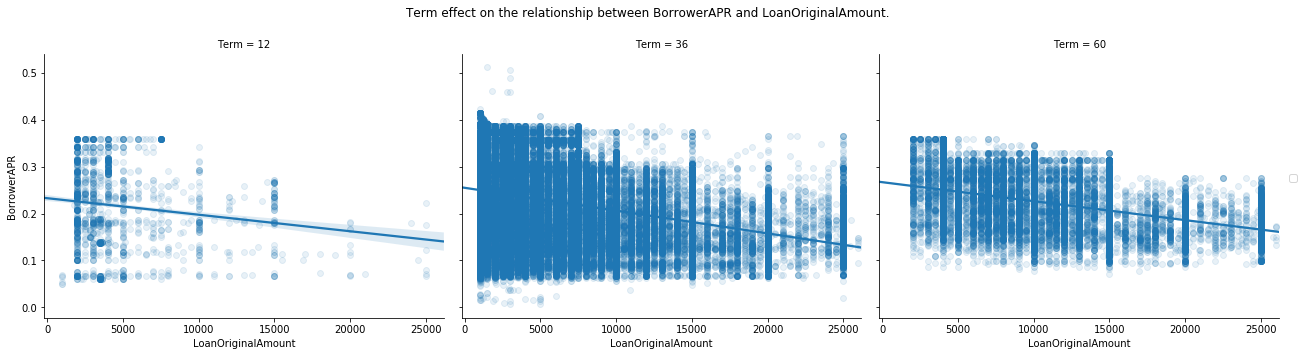

In [74]:
# Term effect on relationship betweem APR and loan amount
g=sb.FacetGrid(data=loan_data, col='Term', col_wrap=3, size=5, aspect=1.2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.suptitle('Term effect on the relationship between BorrowerAPR and LoanOriginalAmount.')
plt.subplots_adjust(top=0.85)
g.add_legend();

As term increases the offset value of BorrowerAPR increaes while the negative relationship betweem BorrowerAPR and LoanOriginalAmount remaines the same.

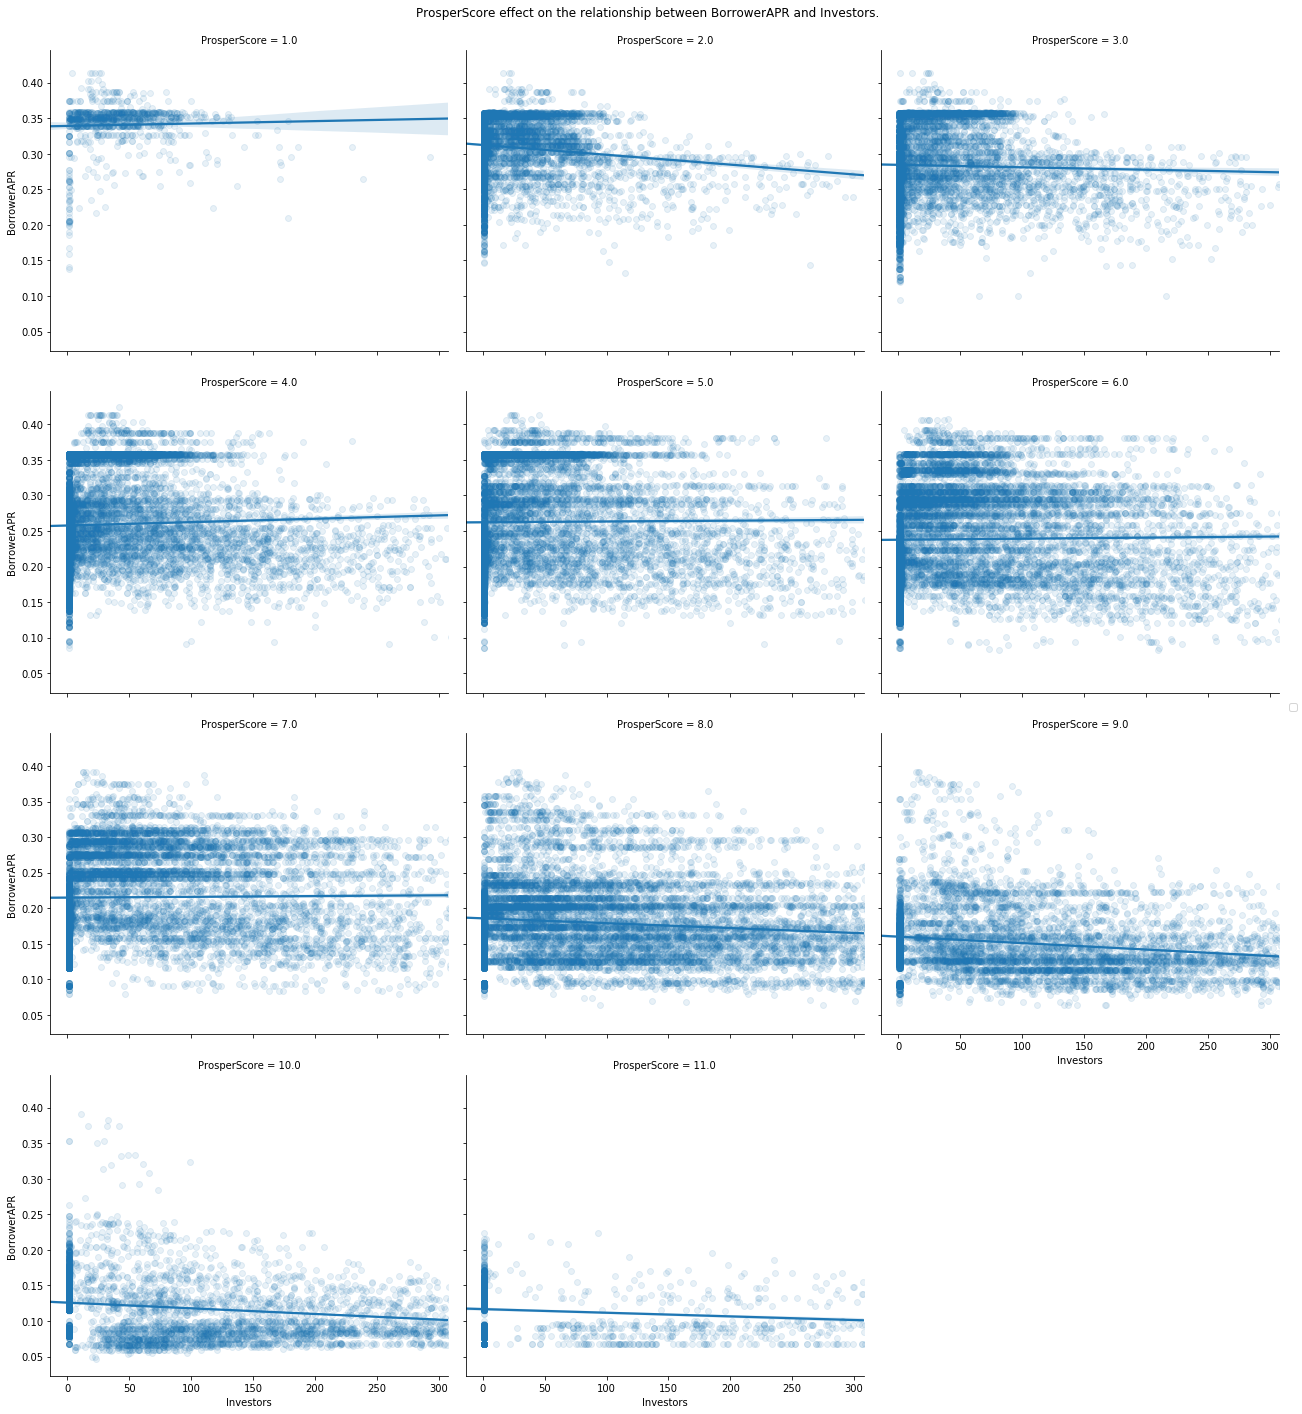

In [76]:
# Prosper score effect on relationship between APR and investors
g=sb.FacetGrid(data=loan_data, col='ProsperScore', col_wrap=3, size=5, aspect=1.2)
g.map(sb.regplot, 'Investors', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.suptitle('ProsperScore effect on the relationship between BorrowerAPR and Investors.')
plt.subplots_adjust(top=0.95)
g.add_legend();

As prosper score increases the the offset value of BorrowerAPR decreases while the correlation betweem BorrowerAPR and investors swings from slightly positive to negative.

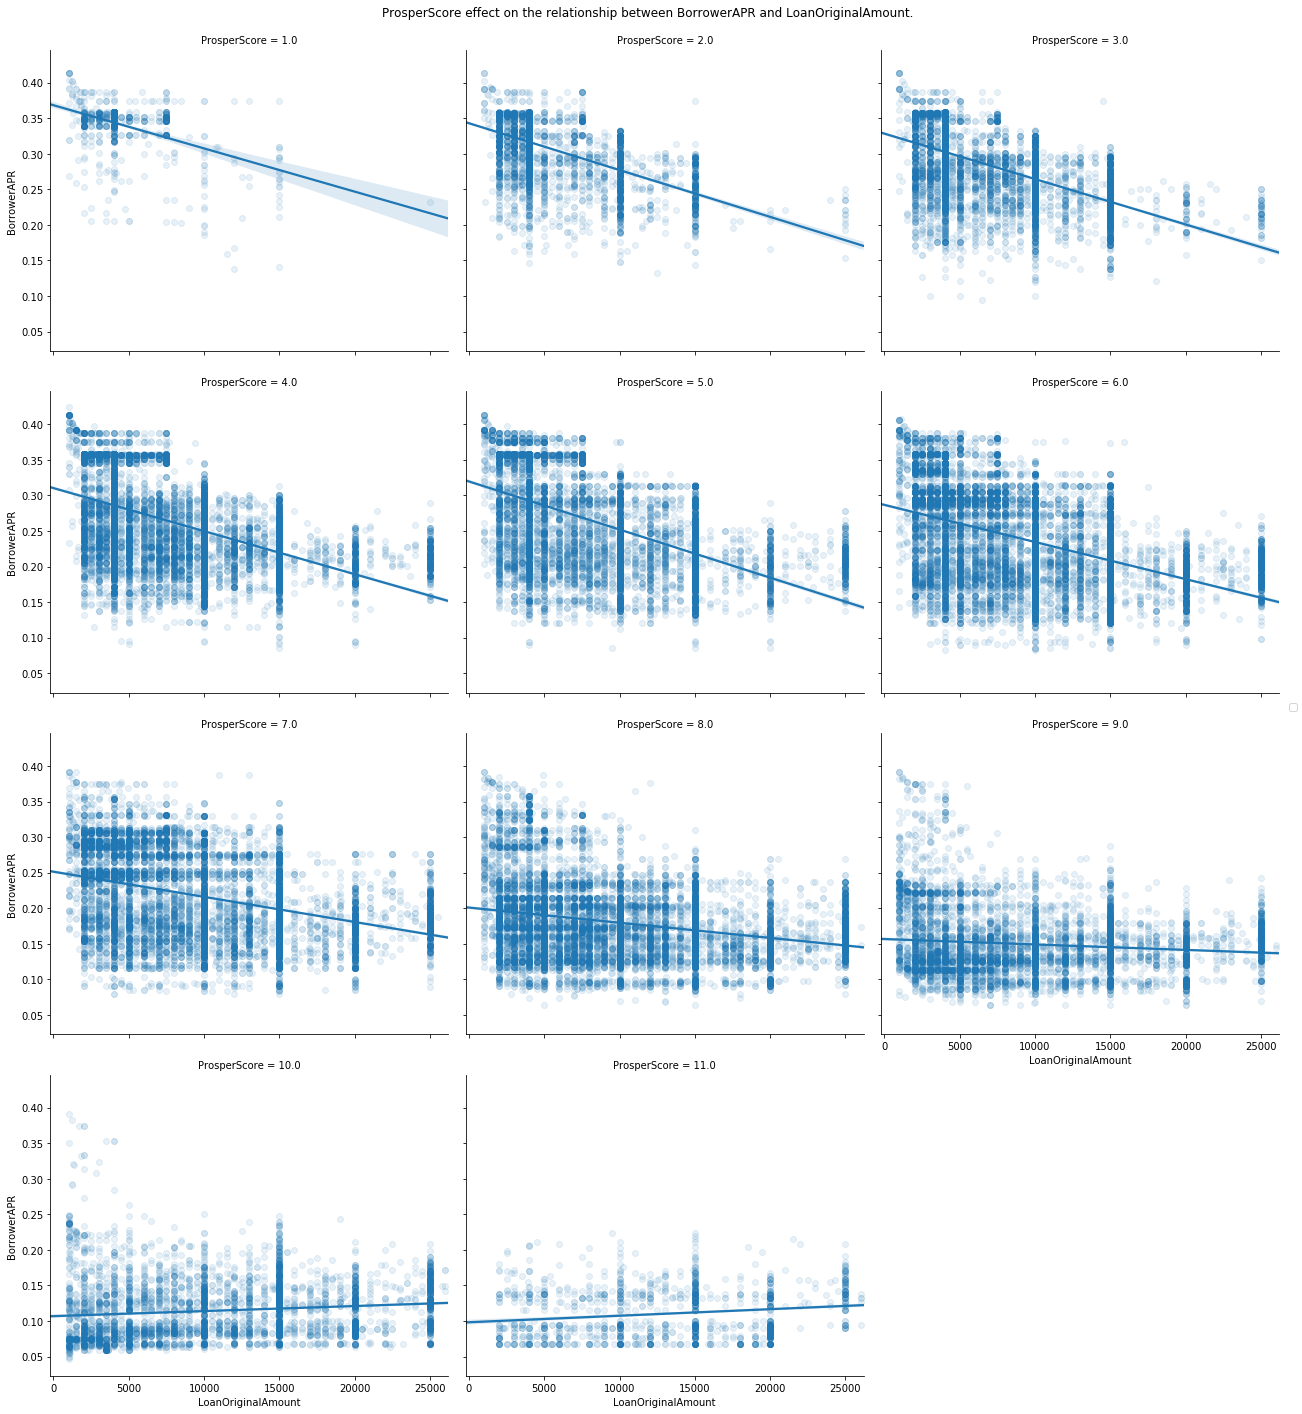

In [75]:
# Prosper score effect on relationship between APR and loan amount
g=sb.FacetGrid(data=loan_data, col='ProsperScore', col_wrap=3, size=5, aspect=1.2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.suptitle('ProsperScore effect on the relationship between BorrowerAPR and LoanOriginalAmount.')
plt.subplots_adjust(top=0.95)
g.add_legend();

As prosper score increases the negative correlation beween BorrowerAPR and LoanOriginalAmount decreases and travels through no correlation to finally end on positive correlation at a prosper score of 11. 

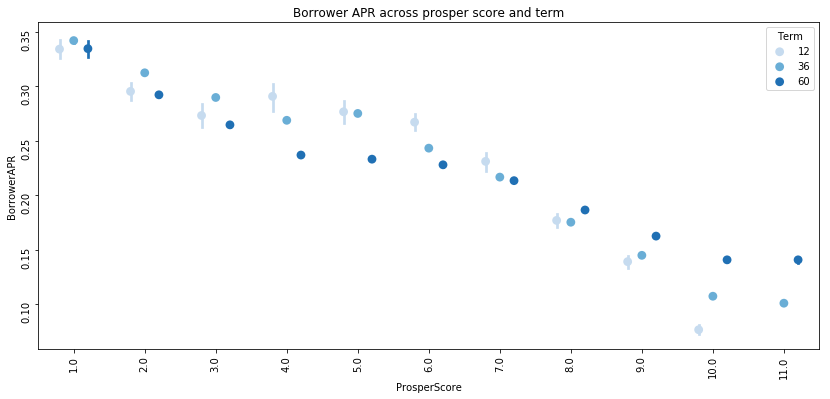

In [77]:
# Prosper score and Term effect on BorrowerAPR
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = loan_data, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.tick_params(rotation=90)
plt.title('Borrower APR across prosper score and term')
plt.show();

As term increases the negative relationship between BorrowerAPR and ProsperScore decreases. For a prosper score between 1 and 3 a lower term results in a lower BorrowerAPR. For a prosper score between 3 and 6, a higher term results in lower BorrowerAPR. At a prosper score of 7 or higher, a higher term results in a higher BorrowerAPR.

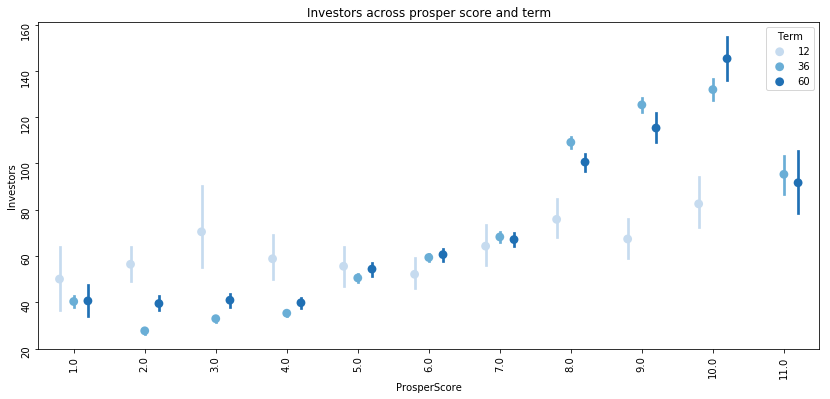

In [79]:
# Prosper score and Term effect on Investors
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = loan_data, x = 'ProsperScore', y = 'Investors', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.tick_params(rotation=90)
plt.title('Investors across prosper score and term')
plt.show();

For a prosper score between 1 and 5 a lower term results in a higher number of investors. For a prosper score between 4 and 8, term has no effect. At a prosper score of 8, 9 and 11, a 36 month term results in a higher number of investors. At a prosper score of 10, a higher term results in a higher number of invetors. 

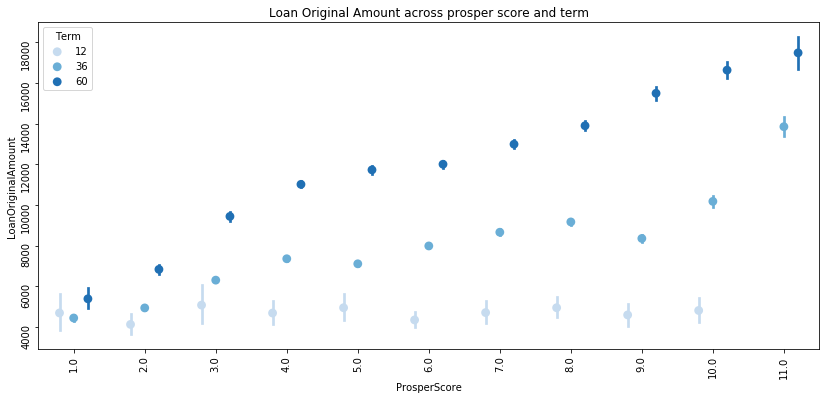

In [78]:
# Prosper score and Term effect on LoanOriginalAmount
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = loan_data, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.tick_params(rotation=90)
plt.title('Loan Original Amount across prosper score and term')
plt.show();

As ProsperScore and term increases the LoanOriginalAmount also increases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of which variables effect BorrowerAPR in this section, by creating multivariable plots of Term, ProsperScore, Investors, LoanOriginalAmount and BorrowerAPR. The multivirate exploration revealed the following:

Term has a similar effect on the relationship between BorrowerAPR and Investors that it has on BorrowerAPR on its own.
It moves towards slightly negative at a higher term.

The negative correlation between BorrowerAPR and LoanORiginalAmount remains intact, but there is an offset with an increase in term.

ProsperScore has a surprising effect on the relationship of BorrowerAPR with both LoanOriginalAmount and Investors. An increase in ProsperScore changes the correlation between BorrowerAPR and both LoanOriginalAmount and Investors. In both cases the correlation changes from either positive to negative or vice versa. 

The relationship between Term, ProsperScore and BorrowerAPR changes at a ProsperScore of 3 and 6. For a prosper score between 1 and 3 a lower term results in a lower BorrowerAPR. For a prosper score between 3 and 6, a higher term results in lower BorrowerAPR. At a prosper score of 7 or higher, a higher term results in a higher BorrowerAPR.

### Were there any interesting or surprising interactions between features?

There was a suprising interaction between Prosper score, term and number of investors. For a prosper score between 1 and 5 a lower term results in a higher number of investors. For a prosper score between 4 and 8, term has no effect. At a prosper score of 8, 9 and 11, a 36 month term results in a higher number of investors. At a prosper score of 10, a higher term results in a higher number of invetors. 

## Conclusions
#### Discussion:
In order to understand BorrowerAPR and the relationship it has with ProsperScore, CreditScoreRangeLower, CreditScoreRangeUpper, IncomeRange, Term, BorrowerRate, LoanOriginalAmount and Investors each variables distribution was plotted to begin with. 

From the BorrowerAPR  distribution graph we saw that the borrower APR distribution span across the 0.006-0.52 range and is multimodal and slightly skewed to the right, with a peak around 0.17, 0.29 and a large peak around 0.358.

From the BorrowerRate distribution graph we saw that BorrowerRate span from 0-0.5 and is slightly skewed to the right, with a large peak at 0.32. As expected the borrower rate distribution has a similar shape to the borrower APR, just moved lower, as it excludes fees which are included in the APR.

From the LoanOriginalAmount distribution graph we saw that the value of loans ranged from \\$1000 - \\$35000. The distribution is skewed to the right, with most loans below a value of \\$12000. Round numbers are popular with peaks at 2000, 3000, 4000, 5000, 10000, 15000, 20000 and 25000. The most popular loan amount is \\$4000.

From the Term distribution graph we saw that there are three terms on which money is borrowed, 12, 36 or 60 months. 36 months is the most popular term.

From the Investors distribution graph we saw that the number of investors ranged from 1 to 1189 and is right skewed with very few loans with more than 800 investors. As there was a very large tail Investors was plotted on a log-scale, which revealed a very large spike at 1, and a normal distribution around 90.

From the CreditScoreRangeLower and Upper distribution we saw that the credit score ranges were from 0-900 and left skewed. 680-699 is the most popular credit score range.

From the ProsperScore distribution we saw that the ProsperScore could take on a value of 1 to 11 and that the most popular prosper scores are 4, 6 and 8.

From the IncomeRange distribution we saw that the IncomeRange could take on a value in the following list: '\\$0', 'Not employed', 'Not displayed',  '\\$1-24,999', '\\$25,000-49,999', '\\$50,000-74,999', '\\$75,000-99,999', '\\$100,000+'. The most popular income range is \\$25000-49999. People in the \\$25000-49999 and \\$50000-74999 income ranges borrows the most money.

To determine the pairwise relationship between features Bivariate exploration was performed.

From the plot matrix graph we saw that BorrowerAPR and BorrowerRate are highly correlated with one another, which is expected since BorrowerAPR is BorrowerRate plus fees. We also saw that as the loan amount increased the number of investors also increased. A larger amount being borrowed or a higher number of investors results in a lower interest rate and APR.

From the BorrowerAPR, BorrowerRate, LoanOriginalAmount and Investors by Term and ProsperScore graph we saw that a higher ProsperScore results in a lower interest rate and APR, a higher number of investors and a larger amount being borrowed. We also saw that a longer loan period results in a higher interest rate, a larger amount being borrowed and fewer investors. The loan period has no effect on APR.

From the BorrowerAPR, BorrowerRate, LoanOriginalAmount and Investors by CreditScoreRangeLower and IncomeRange graph we saw that 
A higher credit score range or a higher income range results in a lower interest rate, a lower APR, a larger amount being borrowed, and a higher number of investors.

From the ProsperScore, CreditScoreRange and IncomeRange vs Term graphs we saw that 36 months receives preference irrespective of ProsperScore, CreditScoreRange or IncomeRange.

From the CreditScoreRange vs IncomeRange graphs we saw that a higher credit score results in a higher income range.

From the CreditScoreRange, IncomeRange vs ProsperScore graphs we saw that a higher credit score or a higher income range results in a higher prosper score.

To extended our exploration of the relationships between variables multivariate plots were created.

From the Term effect on the relationship between BorrowerAPR and Investors graph we saw that as term increases the strong negative correlation between the number of investors and BorrowerAPR changes to slightly negative correlation at a term of 60 months.

From the Term effect on the relationship between BorrowerAPR and LoanOriginalAmount we saw that as term increases the offset value of BorrowerAPR increaes while the negative relationship betweem BorrowerAPR and LoanOriginalAmount remaines the same.

From the ProsperScore effect on the relationship between BorrowerAPR and Investors graph we saw that as prosper score increases the the offset value of BorrowerAPR decreases while the correlation betweem BorrowerAPR and investors swings from slightly positive to negative.

From the ProsperScore effect on the relationship between BorrowerAPR and LoanOriginalAmount.graph we saw that as prosper score increases the negative correlation beween BorrowerAPR and LoanOriginalAmount decreases and travels through no correlation to finally end on positive correlation at a prosper score of 11.

From the Borrower APR across prosper score and term graph we saw that for a prosper score between 1 and 3 a lower term results in a lower BorrowerAPR. For a prosper score between 3 and 6, a higher term results in lower BorrowerAPR. At a prosper score of 7 or higher, a higher term results in a higher BorrowerAPR.

From the Investors across prosper score and term graph we saw that for a prosper score between 1 and 5 a lower term results in a higher number of investors. For a prosper score between 4 and 8, term has no effect. At a prosper score of 8, 9 and 11, a 36 month term results in a higher number of investors. At a prosper score of 10, a higher term results in a higher number of invetors. 

From the Loan Original Amount across prosper score and term graph we saw that as ProsperScore and term increases the LoanOriginalAmount also increases.

#### Results: Our data implies that
1. ProsperScore, Investors, LoanOriginalAmount, CreditScoreRange and IncomeRange are positively correlated with one another.
2. BorrowerAPR is highly correlated with BorrowerRate.
3. A higher Prosper score, a higher credit score, a higher number of investors, a larger amount being borrowed or a higher income range will result in a lower interest rate and APR.
4. 36 months loan term is prefered.
5. Term has a slight effect on the relationship between BorrowerAPR and Investors.
6. Term has no effect on the relationship between BorrowerAPR and LoanOriginalAmount.
7. ProsperScore changes the correlation between BorrowerAPR and both Investors and LoanOriginalAmount.
8. ProsperScore and term significantly influences BorrowerAPR, Investors and LoanOriginalAmount.
9. There is a positive relationship between Term, ProsperScore and LoanOriginalAmount.

#### Limitations: Our data has a few limitations
1. There are too many columns 81, which means that import information can get lost